## Imports

In [1]:
import json
import os
import os.path as osp
import time

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from apxinfer.core.model import XIPModel
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score, recall_score
from willump.evaluation.willump_executor import willump_execute


## Task Specifics (Specific)

In [2]:
from apxinfer.examples.student.trainer import StudentQNoTrainer

working_dir = os.getcwd()
task_name = "studentqno18"
model_name = "rf"
model_file = "rf.pkl"
preparation_rescale = 1000
assert working_dir == '/home/ckchang/Biathlon/willump-adaptation' # change to your own
os.chdir('..') # depending on your directory structure
working_dir = os.getcwd()

## Model Training Parameters

In [3]:

# model arguments
seed = 0
scaler_type = None
multi_class = False


## Loading Model, Data and Feature

In [4]:

# read in the model
original_model = joblib.load(osp.join(working_dir, task_name, "model", model_file))

# read the dataset
train_set = pd.read_csv(osp.join(working_dir, task_name, "dataset", "train_set.csv"))
test_set = pd.read_csv(osp.join(working_dir, task_name, "dataset", "test_set.csv"))
num_rows = len(test_set)


cols = list(train_set.columns)
fnames = [col for col in cols if col.startswith("f_")]
label_name = cols[-1]

def read_feature_info():
  # read in the feature info
  evals_exact = json.load(open(osp.join(working_dir, task_name, "evals_exact.json"), "r"))
  num_reqs = 1
  group_costs = evals_exact["avg_qtime_query"]
  return (num_reqs, group_costs)

num_reqs, group_costs = read_feature_info()
num_groups = len(group_costs)
num_reqs *= preparation_rescale

## Willump Registration Functions (Specific)

In [5]:

# training
def tdfraud_train(y, X_list):
  X = np.concatenate(X_list, axis=1)
  # X = pd.concat(X_list, axis=1)
  trainer = StudentQNoTrainer(
    working_dir,
    original_model.model_type,
    model_name,
    seed,
    scaler_type,
    multi_class,
  )
  model = trainer.build_model(X, y)
  return model


def tdfraud_predict(model, X_list):
  X = np.concatenate(X_list, axis=1)
  # X = pd.concat(X_list, axis=1)
  if X.shape[0] == 0:
    return np.zeros(0, dtype=np.int64)
  else:
    return model.predict(X)


def tdfraud_confidence(model: XIPModel, X_list):
  X = np.concatenate(X_list, axis=1)
  # X = pd.concat(X_list, axis=1)
  return model.predict_proba(X)[:, 1]


def tdfraud_score(true_y, pred_y):
  return roc_auc_score(true_y, pred_y)



### Generated Transformation Functions

In [6]:

def pseudo_transform_function0(input_x):
  time.sleep(group_costs[0] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-0")]].to_numpy()

def pseudo_transform_function1(input_x):
  time.sleep(group_costs[1] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-1")]].to_numpy()

def pseudo_transform_function2(input_x):
  time.sleep(group_costs[2] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-2")]].to_numpy()

def pseudo_transform_function3(input_x):
  time.sleep(group_costs[3] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-3")]].to_numpy()

def pseudo_transform_function4(input_x):
  time.sleep(group_costs[4] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-4")]].to_numpy()

def pseudo_transform_function5(input_x):
  time.sleep(group_costs[5] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-5")]].to_numpy()

def pseudo_transform_function6(input_x):
  time.sleep(group_costs[6] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-6")]].to_numpy()

def pseudo_transform_function7(input_x):
  time.sleep(group_costs[7] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-7")]].to_numpy()

def pseudo_transform_function8(input_x):
  time.sleep(group_costs[8] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-8")]].to_numpy()

def pseudo_transform_function9(input_x):
  time.sleep(group_costs[9] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-9")]].to_numpy()

def pseudo_transform_function10(input_x):
  time.sleep(group_costs[10] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-10")]].to_numpy()

def pseudo_transform_function11(input_x):
  time.sleep(group_costs[11] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-11")]].to_numpy()

def pseudo_transform_function12(input_x):
  time.sleep(group_costs[12] * input_x.shape[0] / num_reqs)
  return input_x[[fname for fname in fnames if fname.endswith("q-12")]].to_numpy()


num_feature_groups = 13
feature_importances = original_model.model.feature_importances_
groups = [[j for j in range(len(fnames)) if fnames[j].endswith(f"q-{i}")] for i in range(num_feature_groups)]
feature_group_importances = {f'feature{i}': feature_importances[group].sum() for i, group in enumerate(groups)}

cascades_dict = {'feature_importances': feature_group_importances}
@willump_execute(
  train_function=tdfraud_train,
  predict_function=tdfraud_predict,
  confidence_function=tdfraud_confidence,
  score_function=tdfraud_score,
  train_cascades_params=cascades_dict,
)
def tdfraud_train_pipeline(input_x, input_y):
  feature0 = pseudo_transform_function0(input_x)
  feature1 = pseudo_transform_function1(input_x)
  feature2 = pseudo_transform_function2(input_x)
  feature3 = pseudo_transform_function3(input_x)
  feature4 = pseudo_transform_function4(input_x)
  feature5 = pseudo_transform_function5(input_x)
  feature6 = pseudo_transform_function6(input_x)
  feature7 = pseudo_transform_function7(input_x)
  feature8 = pseudo_transform_function8(input_x)
  feature9 = pseudo_transform_function9(input_x)
  feature10 = pseudo_transform_function10(input_x)
  feature11 = pseudo_transform_function11(input_x)
  feature12 = pseudo_transform_function12(input_x)
  return tdfraud_train(input_y, [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12])



## Training with Willump

In [7]:

tdfraud_train_pipeline(train_set[fnames], train_set[label_name].to_numpy())
willump_model = tdfraud_train_pipeline(train_set[fnames], train_set[label_name].to_numpy())
print("Cascades dict contents:", cascades_dict)


INFO:XIPTrainer:Building pipeline for classifier rf
INFO:XIPTrainer:Building pipeline for classifier rf
INFO:XIPTrainer:Building pipeline for classifier rf


Feature: feature1                  Cost: 10.662 Importance:  0.125
Feature: feature0                  Cost: 10.820 Importance:  0.122
Feature: feature3                  Cost: 11.150 Importance:  0.115
Feature: feature6                  Cost: 11.258 Importance:  0.112
Feature: feature4                  Cost: 11.253 Importance:  0.112
Feature: feature5                  Cost: 11.272 Importance:  0.108
Feature: feature7                  Cost: 10.428 Importance:  0.107
Feature: feature2                  Cost: 10.071 Importance:  0.089
Feature: feature10                 Cost: 12.355 Importance:  0.040
Feature: feature12                 Cost: 12.640 Importance:  0.036
Feature: feature11                 Cost: 12.168 Importance:  0.019
Feature: feature9                  Cost: 11.576 Importance:  0.012
Feature: feature8                  Cost: 11.513 Importance:  0.005


INFO:XIPTrainer:Building pipeline for classifier rf


Cutoff: 0.100000 Threshold: 0.600000 Expected Cost: 11.617311


INFO:XIPTrainer:Building pipeline for classifier rf


Cutoff: 0.200000 Threshold: 0.600000 Expected Cost: 21.801352


INFO:XIPTrainer:Building pipeline for classifier rf


Cutoff: 0.300000 Threshold: 0.600000 Expected Cost: 43.933613


INFO:XIPTrainer:Building pipeline for classifier rf


Cutoff: 0.400000 Threshold: 0.600000 Expected Cost: 55.181738


INFO:XIPTrainer:Building pipeline for classifier rf


Cutoff: 0.500000 Threshold: 0.600000 Expected Cost: 66.431788


INFO:XIPTrainer:Building pipeline for classifier rf


Cutoff: 0.600000 Threshold: 0.600000 Expected Cost: 86.926155


INFO:XIPTrainer:Building pipeline for classifier rf


Cascades dict contents: {'feature_importances': {'feature0': 0.12212522611245485, 'feature1': 0.12472961218301683, 'feature2': 0.08915049867413652, 'feature3': 0.11487543741831402, 'feature4': 0.1115085369164541, 'feature5': 0.10750839957349329, 'feature6': 0.11157318768913374, 'feature7': 0.10730772075452008, 'feature8': 0.00493821309806094, 'feature9': 0.01152203906336185, 'feature10': 0.04039998177583344, 'feature11': 0.018660275205153527, 'feature12': 0.035700871536066804}, 'selected_feature_indices': [1], 'cascade_threshold': 0.6, 'full_model': XIPClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
              criterion='gini', max_depth=None, max_features='sqrt',
              max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
              oob_score=False, random_state=0, verbose=0, warm_start=False), 'approximate_model': XIP

## Evaluation

In [8]:

result_dict = {"baseline": {}, "willump": {}, "preparation_rescale": preparation_rescale}

### Baseline (Specific)

In [9]:

## baseline
def tdfraud_eval_pipeline(input_x, model):
  feature0 = pseudo_transform_function0(input_x)
  feature1 = pseudo_transform_function1(input_x)
  feature2 = pseudo_transform_function2(input_x)
  feature3 = pseudo_transform_function3(input_x)
  feature4 = pseudo_transform_function4(input_x)
  feature5 = pseudo_transform_function5(input_x)
  feature6 = pseudo_transform_function6(input_x)
  feature7 = pseudo_transform_function7(input_x)
  feature8 = pseudo_transform_function8(input_x)
  feature9 = pseudo_transform_function9(input_x)
  feature10 = pseudo_transform_function10(input_x)
  feature11 = pseudo_transform_function11(input_x)
  feature12 = pseudo_transform_function12(input_x)
  return tdfraud_predict(model, [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12])

unopt_time_elapsed_total = 0
result_dict["baseline"]["latency"] = []
baseline_preds = np.zeros(num_rows)

for i in range(num_rows):
  entry = test_set.iloc[i:i+1]
  time_start = time.time()
  preds = tdfraud_eval_pipeline(entry, willump_model)
  time_elapsed = time.time() - time_start
  result_dict["baseline"]["latency"].append(time_elapsed)
  baseline_preds[i] = int(preds[0])
  unopt_time_elapsed_total += time_elapsed
baseline_throughput = num_rows / unopt_time_elapsed_total
baseline_accuracy = accuracy_score(test_set[label_name], baseline_preds)
baseline_precision = precision_score(test_set[label_name], baseline_preds)
baseline_recall = recall_score(test_set[label_name], baseline_preds)
baseline_f1 = f1_score(test_set[label_name], baseline_preds)
baseline_roc = roc_auc_score(test_set[label_name], baseline_preds)


print("Elapsed Time %fs" % unopt_time_elapsed_total)
print("Throughput: %f" % baseline_throughput)
print("Accuracy: %f" % baseline_accuracy)

result_dict["baseline"]["throughput"] = baseline_throughput
result_dict["baseline"]["accuracy"] = baseline_accuracy
result_dict["baseline"]["precision"] = baseline_precision
result_dict["baseline"]["recall"] = baseline_recall
result_dict["baseline"]["f1"] = baseline_f1
result_dict["baseline"]["roc"] = baseline_roc


Elapsed Time 10.674202s
Throughput: 44.125079
Accuracy: 0.953291


### Willump (Specific)

In [10]:

## Willump cascade
@willump_execute(
  predict_function=tdfraud_predict,
  confidence_function=tdfraud_confidence,
  predict_cascades_params=cascades_dict,
)
def tdfraud_eval_pipeline_cascades(input_x, model):
  feature0 = pseudo_transform_function0(input_x)
  feature1 = pseudo_transform_function1(input_x)
  feature2 = pseudo_transform_function2(input_x)
  feature3 = pseudo_transform_function3(input_x)
  feature4 = pseudo_transform_function4(input_x)
  feature5 = pseudo_transform_function5(input_x)
  feature6 = pseudo_transform_function6(input_x)
  feature7 = pseudo_transform_function7(input_x)
  feature8 = pseudo_transform_function8(input_x)
  feature9 = pseudo_transform_function9(input_x)
  feature10 = pseudo_transform_function10(input_x)
  feature11 = pseudo_transform_function11(input_x)
  feature12 = pseudo_transform_function12(input_x)
  return tdfraud_predict(model, [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12])

# tdfraud_eval_pipeline_cascades(test_set[:100], willump_model) # Warm-up?
# tdfraud_eval_pipeline_cascades(test_set[:100], willump_model)

cascades_time_elapsed_total = 0
result_dict["willump"]["latency"] = []
result_dict["willump"]["approx_conf"] = []
approximate_model = cascades_dict["approximate_model"]
selected_feature_indices = cascades_dict["selected_feature_indices"]
willump_preds = np.zeros(num_rows)

for i in range(num_rows):
  entry = test_set.iloc[i:i+1]
  time_start = time.time()
  preds = tdfraud_eval_pipeline_cascades(entry, willump_model)
  time_elapsed = time.time() - time_start
  result_dict["willump"]["latency"].append(time_elapsed)
  willump_preds[i] = int(preds[0])

  transform_template = 'pseudo_transform_function{}(entry)'
  feats = [eval(transform_template.format(i)) for i in selected_feature_indices]
  transformed_entry = np.hstack(feats)
  approx_conf = approximate_model.predict_proba(transformed_entry)
  result_dict["willump"]["approx_conf"].append(float(approx_conf[0, 1]))
  cascades_time_elapsed_total += time_elapsed

willump_throughput = num_rows / cascades_time_elapsed_total
willump_accuracy = accuracy_score(test_set[label_name], willump_preds)
willump_precision = precision_score(test_set[label_name], willump_preds)
willump_recall = recall_score(test_set[label_name], willump_preds)
willump_f1 = f1_score(test_set[label_name], willump_preds)
willump_roc = roc_auc_score(test_set[label_name], willump_preds)
if (baseline_preds == 1).all():
  baseline_preds[0] = 0
relative_accuracy = accuracy_score(baseline_preds, willump_preds)
relative_precision = precision_score(baseline_preds, willump_preds)
relative_recall = recall_score(baseline_preds, willump_preds)
relative_f1 = f1_score(baseline_preds, willump_preds)
relative_roc = roc_auc_score(baseline_preds, willump_preds)

print("Elapsed Time %fs" % cascades_time_elapsed_total)
print("Throughput: %f" % willump_throughput)
print("Accuracy: %f" % willump_accuracy)

result_dict["willump"]["throughput"] = willump_throughput
result_dict["willump"]["accuracy"] = willump_accuracy
result_dict["willump"]["precision"] = willump_precision
result_dict["willump"]["recall"] = willump_recall
result_dict["willump"]["f1"] = willump_f1
result_dict["willump"]["roc"] = willump_roc
result_dict["willump"]["relative_accuracy"] = relative_accuracy
result_dict["willump"]["relative_precision"] = relative_precision
result_dict["willump"]["relative_recall"] = relative_recall
result_dict["willump"]["relative_f1"] = relative_f1
result_dict["willump"]["relative_roc"] = relative_roc
result_dict["willump"]["cascades"] = {}
result_dict["willump"]["cascades"]["selected_feature_indices"] = cascades_dict["selected_feature_indices"]
result_dict["willump"]["cascades"]["cascade_threshold"] = cascades_dict["cascade_threshold"]


Elapsed Time 7.158757s
Throughput: 65.793545
Accuracy: 0.953291


### Saving Result

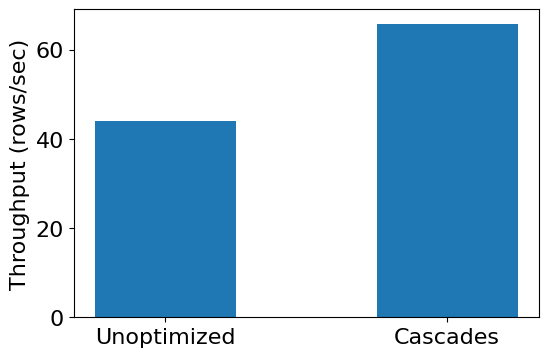

In [11]:

with open(osp.join(working_dir, "model", f"{task_name}_{model_name}.json"), "w") as f:
  json_string = json.dumps(result_dict, indent=4)
  f.write(json_string)


plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
fig, axes = plt.subplots(figsize=(6, 4), ncols=1, nrows=1,
                         sharex=False, sharey=False)
x = np.arange(2)
width = 0.5  # the width of the bars

bars = axes.bar(x, [num_rows / unopt_time_elapsed_total, num_rows / cascades_time_elapsed_total], width)
axes.set(xlabel='', ylabel='Throughput (rows/sec)')
axes.set_xticks(x)
axes.set_xticklabels(["Unoptimized", "Cascades"])
plt.savefig(f'{task_name}_{model_name}.jpg')
